# Day 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [7]:
# Create the data
X, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

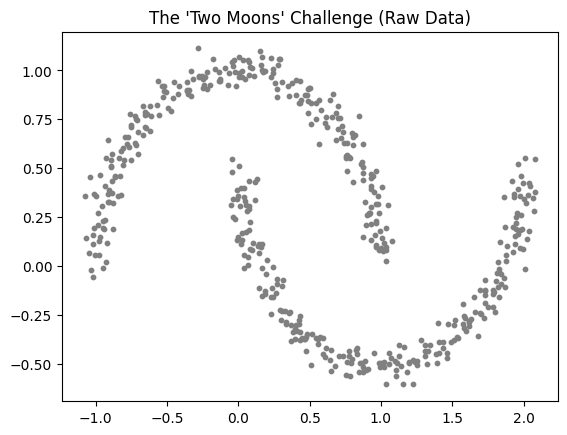

In [8]:
# Visualize the challenge
plt.scatter(X[:, 0], X[:, 1], s=10, color='gray')
plt.title("The 'Two Moons' Challenge (Raw Data)")
plt.show()

In [9]:
from scipy.spatial.distance import pdist, squareform

In [10]:
# Calculate pairwise squared Euclidean distances
dists = squareform(pdist(X, 'sqeuclidean'))

In [11]:
# Apply the kernel (gamma controls how 'local' the connections are)
gamma = 15
W = np.exp(-gamma * dists)

In [12]:
D = np.diag(np.sum(W, axis=1))
L = D - W

In [13]:
# Verification for a Math Major:
# Check if row sums are all zero (property of a Laplacian)
print("Max row sum of L (should be ~0):", np.max(np.abs(np.sum(L, axis=1))))

Max row sum of L (should be ~0): 1.7763568394002505e-14


In [14]:
# We use eigh because L is symmetric
eigenvalues, eigenvectors = np.linalg.eigh(L)

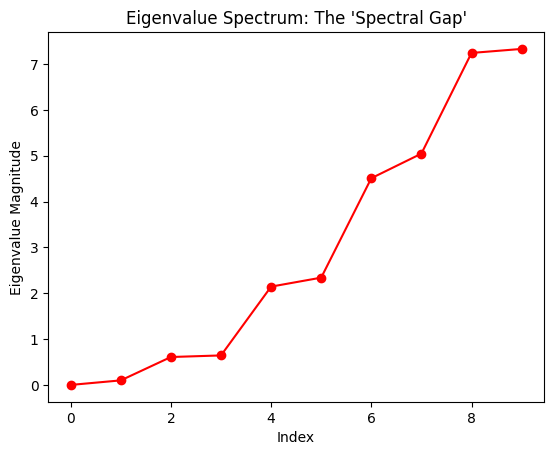

In [15]:
# Plot the eigenvalues to find the "Spectral Gap"
plt.plot(eigenvalues[:10], 'ro-')
plt.title("Eigenvalue Spectrum: The 'Spectral Gap'")
plt.ylabel("Eigenvalue Magnitude")
plt.xlabel("Index")
plt.show()

# Day 2

In [16]:
# Get the second eigenvector (index 1)
fiedler_vector = eigenvectors[:, 1]

In [17]:
# Assign clusters: Positive values = Group 1, Negative = Group 2
labels = fiedler_vector > 0

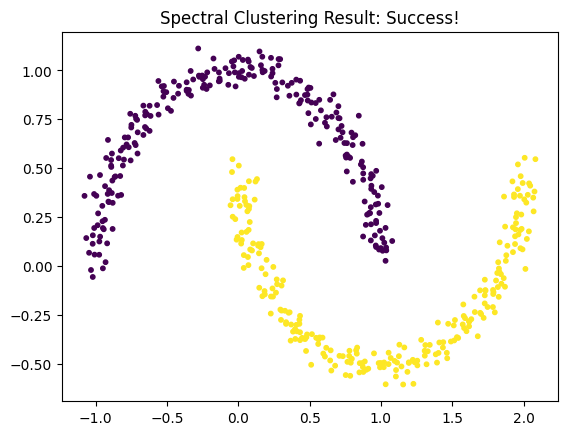

In [18]:
# The Result!
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.title("Spectral Clustering Result: Success!")
plt.show()

# Traditional vs Spectral approach

In [20]:
from sklearn.cluster import KMeans

In [21]:
# Standard K-Means
km = KMeans(n_clusters=2, n_init=10).fit(X)

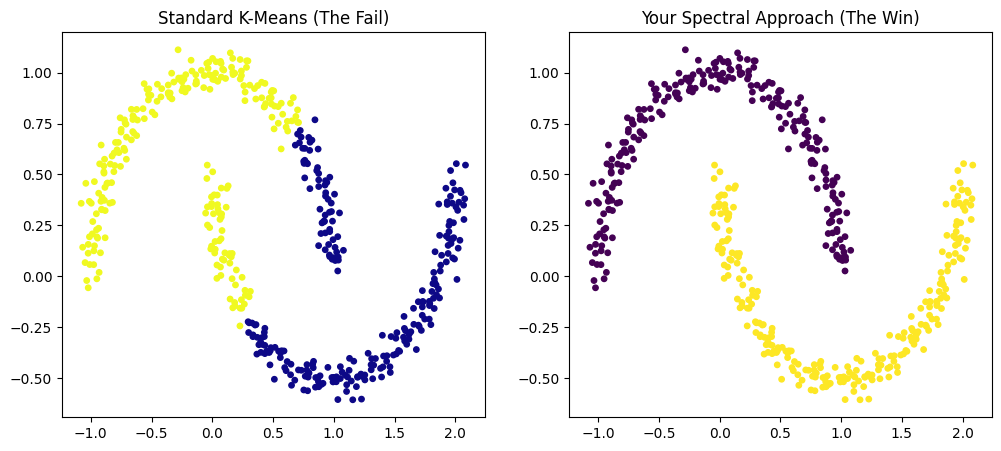

In [22]:
# Plot side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=km.labels_, cmap='plasma', s=15)
ax[0].set_title("Standard K-Means (The Fail)")

ax[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=15)
ax[1].set_title("Your Spectral Approach (The Win)")

plt.show()